# Exploratory Analysis

## Very Much a WIP, so More to Fill Out

## Contents
 - [I. Exploring Raw Data](#Exploring-Raw-Data)
 - [II. Missing Data](#Examining-Missing-Data)
 - [III. Deeper EDA](#Digging-Deeper:-EDA)

In [1]:
# Import packages etc.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno

In [2]:
# Import the old data
# Trains
xtrain_outp = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
xtrain_inp = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
xtrain_benef = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
ytrain = pd.read_csv('Train-1542865627584.csv')

# Tests
xtest_outp = pd.read_csv('Test_Outpatientdata-1542969243754.csv')
xtest_inp = pd.read_csv('Test_Inpatientdata-1542969243754.csv')
xtest_benef = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
ytest = pd.read_csv('Test-1542969243754.csv')

In [3]:
# xtrain INPATIENT Data
print(xtrain_inp.shape)
xtrain_inp.head()

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# xtrain OUTPATIENT Data
print(xtrain_outp.shape)
xtrain_outp.head()

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [5]:
print(xtrain_benef.shape)
xtrain_benef.head()

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


From the shapes, we notice here that the column counts are inconsistent between the inpatient & outpatient sets of data.

In [6]:
# Ascertain which Inpatient features NOT in Outpatient Data
set(xtrain_inp.columns) - set(xtrain_outp.columns)

{'AdmissionDt', 'DiagnosisGroupCode', 'DischargeDt'}

In [7]:
# Examine Target Data, here divvied by Provider
print(ytrain.shape)
ytrain.head()

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


# Processing Thus Far

David's processing:
- Combined Inpatient & Outpatient Rawdata
    - Added Admission_Type Feature
- Merged that with Potential Fraud
- Generated train_all to contain!

### Next Processing Steps
**Feature Engineering:**
- Generated Length_of_Claim feature from ClaimEndDt & ClaimStartDt
- Generated Num_Physicians, Num_ClmProcedureCodes, NumClmDiagnosisCodes, MismatchedAdmitDiagnosisCode

**Combined Beneficiary data:**
- Left Merge on 'BeneID'
- Generated Bene_Age_at_ClaimStartDt from DOB

**Generated Train_All_Provider_Stats_EDITED with:**
- Stats on Train_All.drop(Non-nNumberlist)
    - Mean, Median, 0's, NA's, Mode, Modefreq, mode2, mode2freq, mode3, mode3freq, num_unique



In [9]:
###################################################
### THIS ONLY WORKS WITH PICKLE_JAR FILE FOLDER ###
###################################################

# Import Gottlieb & Tel's Fine Produce branded pickle jar
import pickle

# utterly Raw
xtrain_base = pickle.load(open('Train_All.pickle', 'rb'))
xtrain_basestats = pickle.load(open('Train_All_Stats_EDITED.pickle', 'rb'))

# beneficiary
xtrain_bene = pickle.load(open('Train_All_Bene.pickle', 'rb'))
xtrain_bene_stats = pickle.load(open('Train_All_Bene_Stats.pickle', 'rb'))
xtrain_bene_statsEDIT = pickle.load(open('Train_All_Bene_Stats_EDITED.pickle', 'rb'))

# provider
xtrain_prov_stats = pickle.load(open('Train_All_Provider_Stats.pickle', 'rb'))
xtrain_prov_statsEDIT = pickle.load(open('Train_All_Provider_Stats_EDITED.pickle', 'rb'))
xtrain_prov_statsALL = pickle.load(open('Train_All_Provider_Stats_All.pickle', 'rb'))



In [10]:
print(xtrain_base.columns.to_list())

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Length_of_Stay', 'Admission_Type', 'PotentialFraud', 'Length_of_Claim', 'MonthofClaimStartDt', 'Num_Physicians', 'Num_ClmProcedureCodes', 'Num_ClmDiagnosisCodes', 'MismatchedAdmitDiagnosisCode']


# First Looks

In [11]:
# First Looks @ DG's Engineering
first_look = [xtrain_base, xtrain_basestats, 
              xtrain_bene, xtrain_bene_stats, xtrain_bene_statsEDIT, 
              xtrain_prov_stats, xtrain_prov_statsEDIT, 
              xtrain_prov_statsALL]
firstnames = ['Train All', 'Train AllStats Edit',
             'Train All Bene', 'Train All BeneStats', 'Train All BeneStatsEdit',
             'Train All ProviderStats', 'Train All ProviderStatsEdit', 'Train All ProviderStatsAll']
n = 0

# Shapes, Data Types, Amt. of NA's
for df in first_look:
    print(50*'-')
    print(firstnames[n])
    print()
    print('Shape: ' + str(df.shape))
    print('Dtypes: ' + str(df.dtypes.unique()))
    print('Missingness: ' + str(df.isna().sum().sum()))
    print()
    
    n += 1

--------------------------------------------------
Train All

Shape: (558211, 39)
Dtypes: [dtype('O') dtype('int64') dtype('float64') dtype('int32')]
Missingness: 10508670

--------------------------------------------------
Train AllStats Edit

Shape: (5410, 700)
Dtypes: [dtype('int64') dtype('O') dtype('float64') dtype('int32')]
Missingness: 601808

--------------------------------------------------
Train All Bene

Shape: (558211, 69)
Dtypes: [dtype('O') dtype('int64') dtype('float64') dtype('int32')]
Missingness: 11098954

--------------------------------------------------
Train All BeneStats

Shape: (138556, 252)
Dtypes: [dtype('int64') dtype('float64') dtype('int32')]
Missingness: 5562923

--------------------------------------------------
Train All BeneStatsEdit

Shape: (5410, 295)
Dtypes: [dtype('int64') dtype('O') dtype('float64')]
Missingness: 117918

--------------------------------------------------
Train All ProviderStats

Shape: (5410, 126)
Dtypes: [dtype('int64') dtype('fl

# Exploring Raw Data

[[Back to Top]](#Exploratory-Analysis)

For parsing original information, data dictionaries can be found with https://www.cms.gov/Research-Statistics-Data-and-Systems/Files-for-Order/LimitedDataSets/StandardAnalyticalFiles. 

With processing to this point, 

In [12]:
print('Columns: ' + str(xtrain_prov_statsALL.columns.levels[0].to_list()) + '\n')
print('# Cols: ' + str(len(xtrain_prov_statsALL.columns.levels[0].to_list())))
xtrain_prov_statsALL.head()

Columns: ['AdmissionDt', 'AttendingPhysician', 'BeneID', 'ClaimEndDt', 'ClaimStartDt', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'DiagnosisGroupCode', 'DischargeDt', 'InscClaimAmtReimbursed', 'Length_of_Claim', 'Length_of_Stay', 'MismatchedAdmitDiagnosisCode', 'MonthofClaimStartDt', 'Num_ClmDiagnosisCodes', 'Num_ClmProcedureCodes', 'Num_Physicians', 'OperatingPhysician', 'OtherPhysician']

# Cols: 35


BeneID                ClaimStartDt                ClaimEndDt      \
          count NAs num_unique        count NAs num_unique      count NAs   
Provider                                                                    
PRV51001     25   0         24           25   0         23         25   0   
PRV51003    132   0        117          132   0        111        132   0   
PRV51004    149   0        138          149   0        117        149   0   
PRV51005   1165   0        495         1165   0        356       1165   0   
PRV51007     72   0         58           72   0         68         72   0   

                    AttendingPhysician  ... MismatchedAdmitDiagnosisCode  \
         num_unique              count  ...                        mode2   
Provider                                ...                                
PRV51001         25                 25  ...                          NaN   
PRV51003        112                132  ...                          0.0   
PRV51004        115                149  ...                          0.0   
PRV51005        354               1163  ...                          0.0   
PRV51007         66                 72  ...                          0.0   

                                                                         
         mode_freq2 mode3 mode_freq3   sum min max  med   avg       std  
Provider                                                                 
PRV51001        NaN   NaN        NaN    25   1   1  1.0  1.00  0.000000  
PRV51003       10.0   NaN        NaN   122   0   1  1.0  0.92  0.265618  
PRV51004        3.0   NaN        NaN   146   0   1  1.0  0.98  0.140933  
PRV51005       17.0   NaN        NaN  1148   0   1  1.0  0.99  0.119965  
PRV51007        1.0   NaN        NaN    71   0   1  1.0  0.99  0.117851  

[5 rows x 201 columns]

In [13]:
print('Columns: ' + str(xtrain_bene_statsEDIT.columns.levels[0].to_list()) + '\n')
print('# Cols: ' + str(len(xtrain_bene_statsEDIT.columns.levels[0].to_list())))
xtrain_bene_statsEDIT.head()

Columns: ['Bene_Age_at_ClaimStartDt', 'ChronicCond_Alzheimer', 'ChronicCond_Cancer', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_Heartfailure', 'ChronicCond_IschemicHeart', 'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'County', 'DOB', 'DOD', 'Gender', 'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'OPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'Perc_Paid_by_Insurance', 'Perc_of_AnnualDeductible', 'Perc_of_AnnualReimbursement', 'PotentialFraud', 'Race', 'RenalDiseaseIndicator', 'State', 'TotalAnnualDeductibleAmt', 'TotalAnnualReimbursementAmt']

# Cols: 31


DOB                                                              \
         count NAs num_unique        mode mode_freq       mode2 mode_freq2   
Provider                                                                     
PRV51001    25   0         23  1927-03-01         3  1911-10-01        1.0   
PRV51003   132   0        106  1915-09-01         3  1933-09-01        3.0   
PRV51004   149   0        120  1936-12-01         5  1956-07-01        4.0   
PRV51005  1165   0        316  1942-01-01        26  1942-02-01       20.0   
PRV51007    72   0         55  1919-04-01         3  1938-04-01        3.0   

                                  DOD  ... Perc_Paid_by_Insurance             \
               mode3 mode_freq3 count  ...                  mode2 mode_freq2   
Provider                               ...                                     
PRV51001  1912-04-01        1.0     0  ...              73.746313        1.0   
PRV51003  1934-09-01        3.0     1  ...              78.926598        7.0   
PRV51004  1930-06-01        4.0     1  ...               0.000000        1.0   
PRV51005  1943-08-01       20.0     4  ...              23.076923        3.0   
PRV51007  1940-04-01        3.0     1  ...              66.666667        1.0   

                                                                               \
              mode3 mode_freq3            sum        min    max    med    avg   
Provider                                                                        
PRV51001  78.926598        1.0    2439.139285  73.746313  100.0  100.0  97.57   
PRV51003  84.889643        7.0   11949.388421   0.000000  100.0  100.0  91.22   
PRV51004  16.666667        1.0   14090.182186   0.000000  100.0  100.0  97.85   
PRV51005  55.555556        3.0  110922.441583   0.000000  100.0  100.0  98.07   
PRV51007  73.746313        1.0    6995.653183  66.666667  100.0  100.0  98.53   

                     
                std  
Provider             
PRV51001   6.665914  
PRV51003  16.586617  
PRV51004  12.671242  
PRV51005  10.622541  
PRV51007   5.816781  

[5 rows x 295 columns]

<AxesSubplot:>

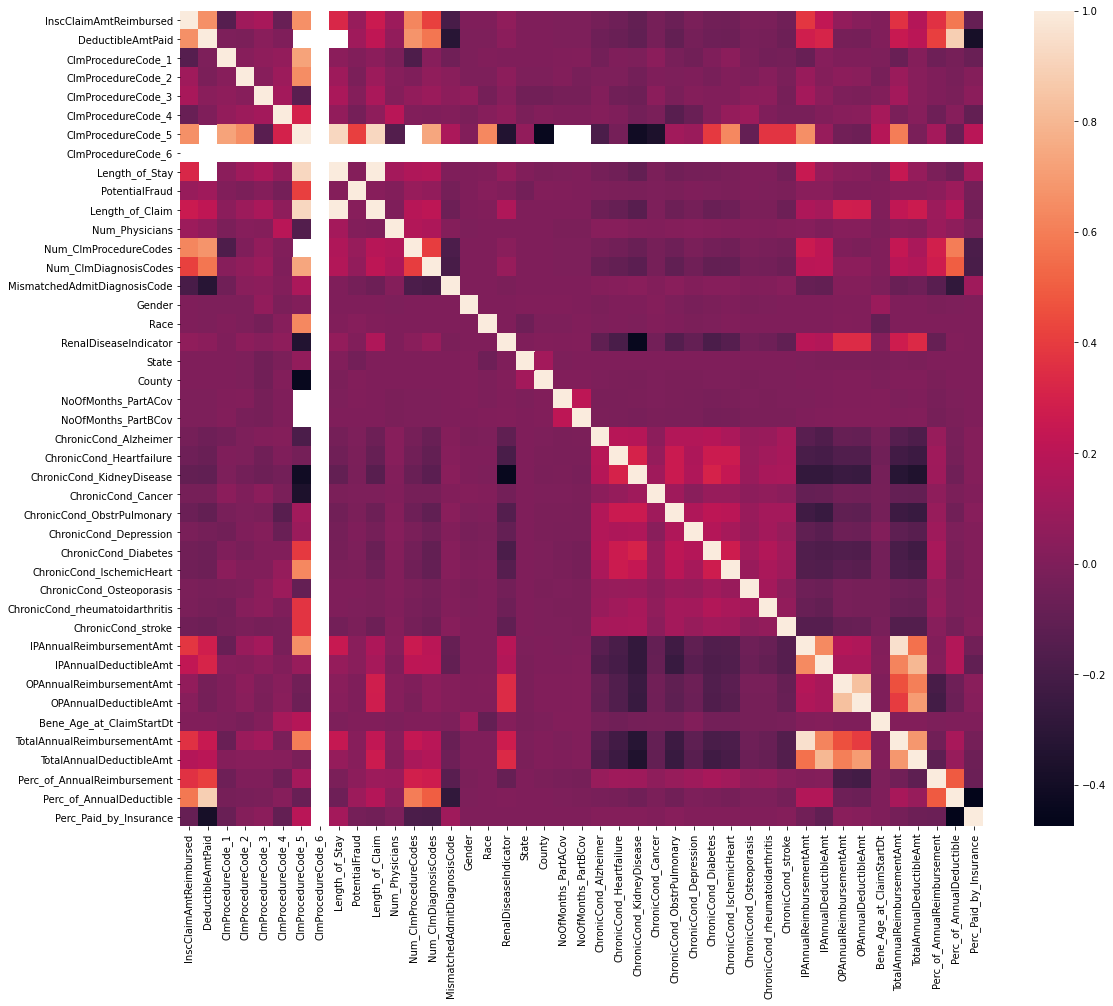

In [14]:
# Explore Heatmap of Interrelated Features
import seaborn as sns

fig = plt.figure(figsize=(18, 15))
sns.heatmap(xtrain_bene.corr())

### What Else We See

**Direct:** 
    - InsClaimAmtReimbursed, DeductibleAmtPaid --> Num_ClmProcedureCodes

**Inverse:**

# Examining Missing Data
[[Back to Top]](#Exploratory-Analysis)

<AxesSubplot:>

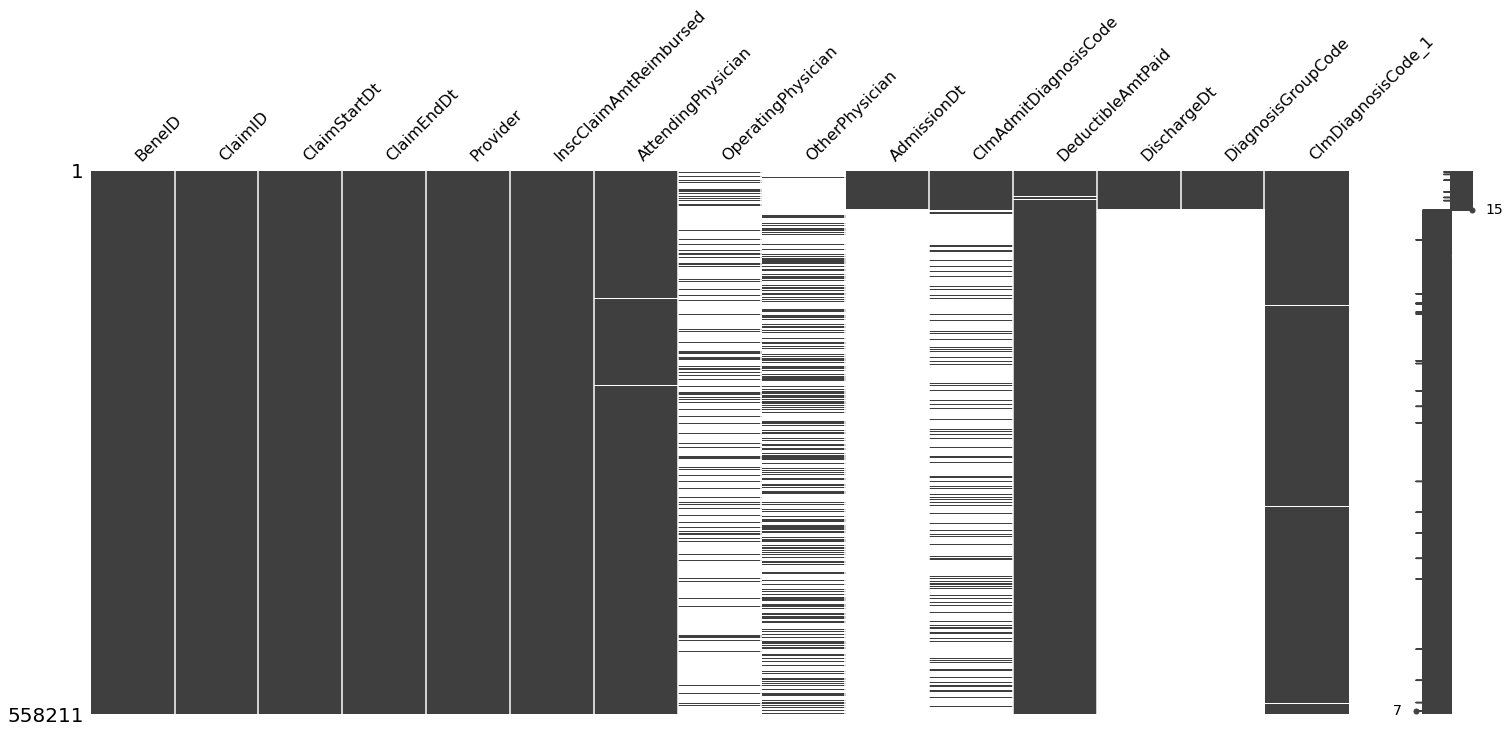

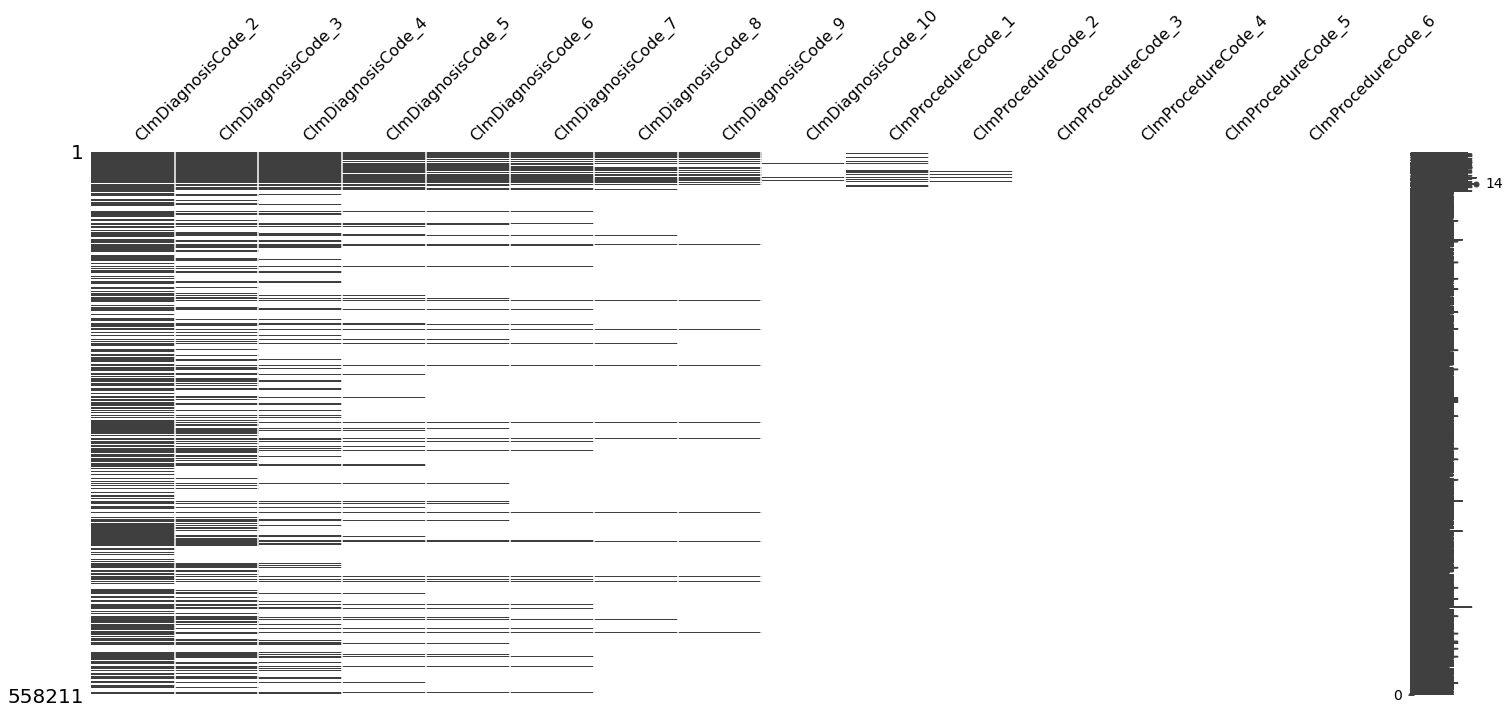

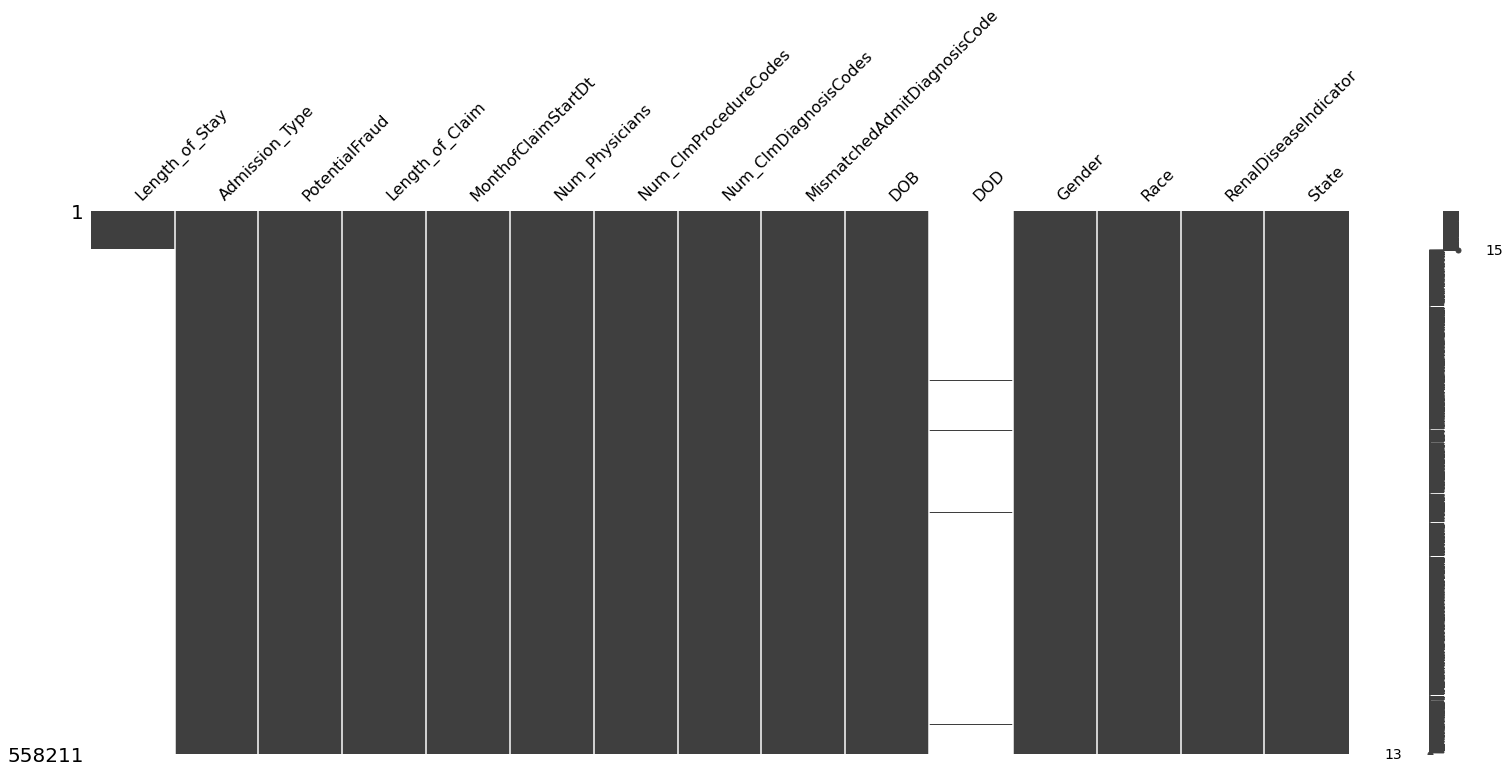

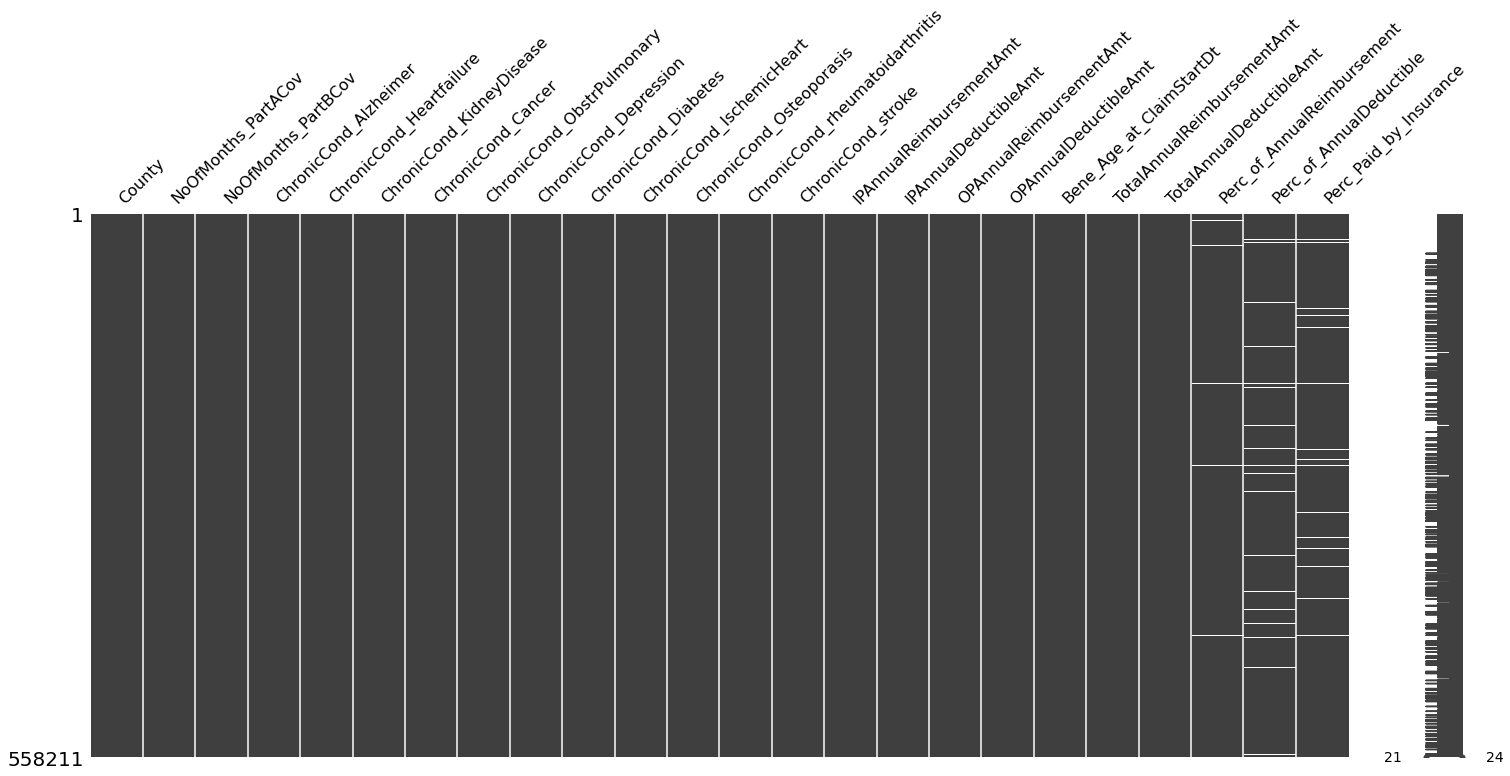

In [15]:
import missingno as msno

msno.matrix(xtrain_bene.iloc[:, :15])
msno.matrix(xtrain_bene.iloc[:, 15:30])
msno.matrix(xtrain_bene.iloc[:, 30:45])
msno.matrix(xtrain_bene.iloc[:, 45:])

<AxesSubplot:>

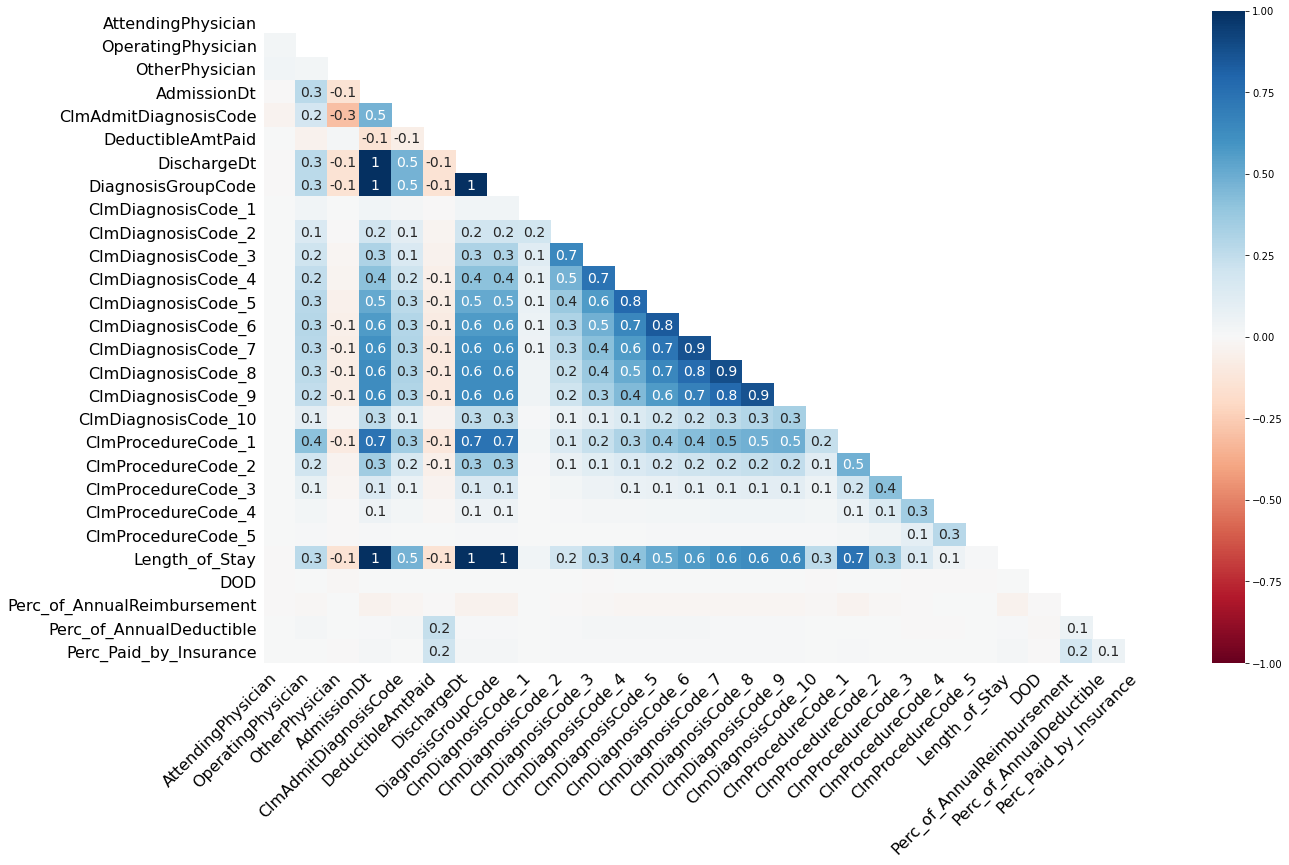

In [16]:
# Explore Interrelatedness Specifically
msno.heatmap(xtrain_bene)

# Warmup Targeted EDA
[Back to Top](#Exploratory-Analysis)

### Section 1

Examine Physicians from Inpatient & Outpatient data

In [17]:
def GetPhysicianList(df):
    # generate list of physicians from 3 relevant columns
    # both df's have AttendingPhysician, OperatingPhysician, & OtherPhysician
    phys = df['AttendingPhysician'].value_counts().index.to_list()
    phys.extend(df['OperatingPhysician'].value_counts().index)
    phys.extend(df['OtherPhysician'].value_counts().index)
    
    # use dict() function to remove duplicates; dicts can't have duplicate keys
    phys = list(dict.fromkeys(phys))
    return phys

def CheckUniquePhys(p_list1, p_list2):
    firstlist = len(set(p_list1) - set(p_list2))
    seconlist = len(set(p_list2) - set(p_list1))
    
    if firstlist > 0:
        print('The first list has uniques!' + ' - ' + str(firstlist))
    if seconlist > 0:
        print('The second list has uniques!' + ' - ' + str(seconlist))
    if (firstlist == 0) & (seconlist == 0):
        print('No uniques in either!')
        

In [18]:
outp_phys = GetPhysicianList(xtrain_outp)
inp_phys = GetPhysicianList(xtrain_inp)

CheckUniquePhys(outp_phys, inp_phys)
print('Total Doctors: ' + str(len(outp_phys)))

The first list has uniques! - 82481
The second list has uniques! - 10967
Total Doctors: 89770


**Inpatients vs. Outpatients: Let's Get Chronic**

Do inpatients show worse health (chronic diseases) than outpatients, typically speaking? Or do patients with MORE visits have worse health?

In [19]:
# List all chronics
conds = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
         'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
         'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
         'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

# Ensure all are ints and absolute vals
for cond in conds:
    xtrain_bene[cond] = list(map(lambda x: np.abs(int(x)), xtrain_bene[cond]))
    
# Generate Number of Chronic Conds
xtrain_bene.loc[:,'Num_ChronicConds'] = xtrain_bene[conds].sum(axis=1)

<AxesSubplot:xlabel='Num_ChronicConds', ylabel='Admission_Type'>

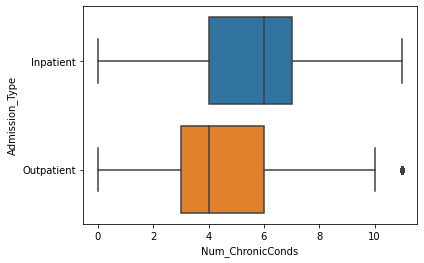

In [20]:
sns.boxplot(x=xtrain_bene['Num_ChronicConds'], y=xtrain_bene['Admission_Type'])

In [21]:
xtrain_bene.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Bene_Age_at_ClaimStartDt,TotalAnnualReimbursementAmt,TotalAnnualDeductibleAmt,Perc_of_AnnualReimbursement,Perc_of_AnnualDeductible,Perc_Paid_by_Insurance,Num_ChronicConds
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,3204,60,70,66.0,36060,3274,72.222222,33.333333,96.054382,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,3204,60,70,66.0,36060,3274,13.888889,33.333333,82.399473,7
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,3204,60,70,66.0,36060,3274,13.888889,33.333333,82.399473,7
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1068,250,320,94.0,5250,1388,100.000000,100.000000,82.399473,6
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2136,120,100,71.0,21380,2236,47.036689,50.000000,90.350560,5


<AxesSubplot:xlabel='mean', ylabel='Count'>

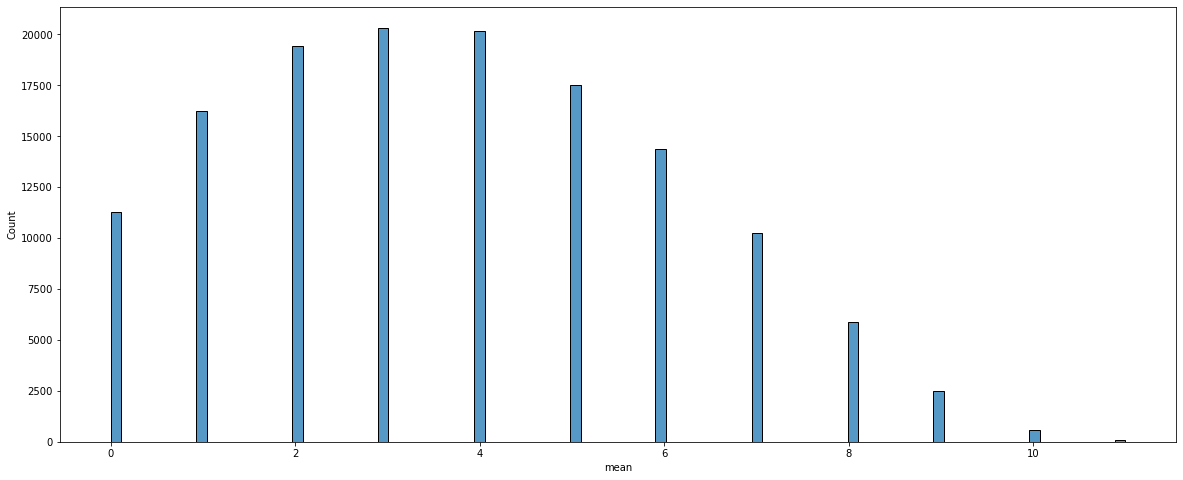

In [22]:
fig, ax = plt.subplots(figsize=(20,8))

bene_conds = xtrain_bene.groupby(by='BeneID').agg(['count', 'mean'])['Num_ChronicConds']

#################FIX THIS; Histplot?

sns.histplot(x=bene_conds['mean'])

In [23]:
print('Total Beneficiaries:  ' + str(bene_conds.shape[0]))

Total Beneficiaries:  138556


Do doctors serve different providers? Distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

<AxesSubplot:xlabel='Provider', ylabel='Density'>

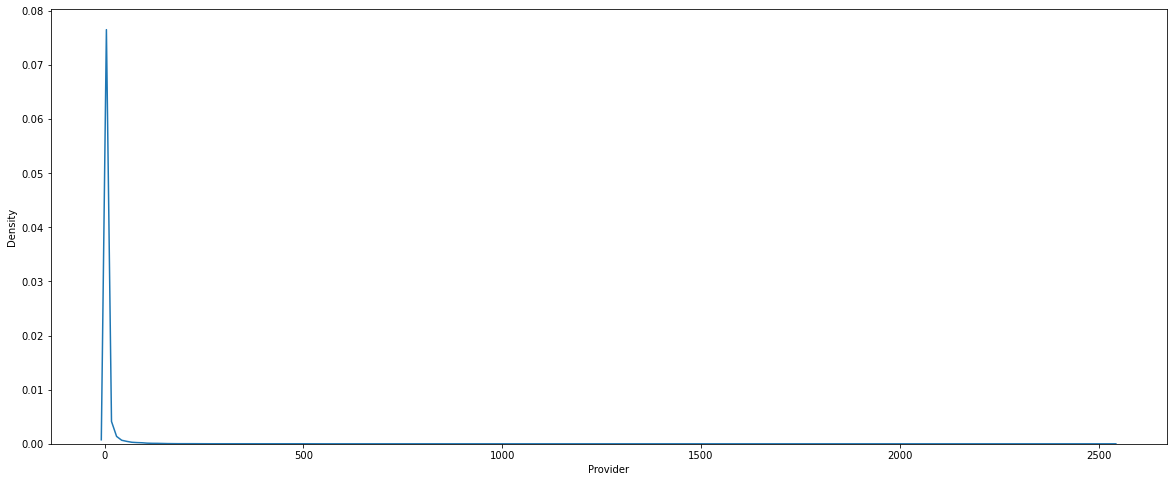

In [24]:
fig, ax = plt.subplots(figsize=(20,8))

doct_prov = xtrain_bene.groupby(by='AttendingPhysician').agg('count').reset_index()[['AttendingPhysician', 'Provider']]
sns.kdeplot(x=doct_prov['Provider'])

In [25]:
doct_prov.describe()

,Provider
count,82063.000000
mean,6.783849
std,29.907658
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,2534.000000


Do patients go to different hospitals? Distribution of hospital counts/patient? Is it possible to characterize patients who receive services from many hospitals?

<AxesSubplot:xlabel='Provider', ylabel='Density'>

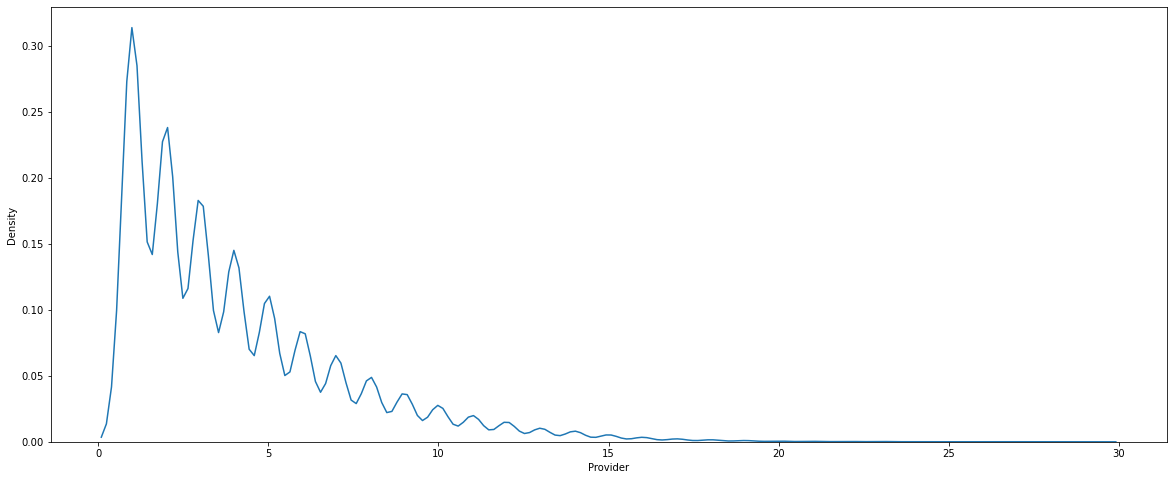

In [26]:
fig, ax = plt.subplots(figsize=(20,8))

# Concentration of Beneficiaries per Provider
bene_hosp = xtrain_bene.groupby(by='BeneID').agg('count').reset_index()[['BeneID', 'Provider']]
sns.kdeplot(x=bene_hosp['Provider'])

In [27]:
test = pd.merge(xtrain_bene, bene_hosp, on='BeneID')
test.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider_x,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Bene_Age_at_ClaimStartDt,TotalAnnualReimbursementAmt,TotalAnnualDeductibleAmt,Perc_of_AnnualReimbursement,Perc_of_AnnualDeductible,Perc_Paid_by_Insurance,Num_ChronicConds,Provider_y
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,60,70,66.0,36060,3274,72.222222,33.333333,96.054382,7,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,60,70,66.0,36060,3274,13.888889,33.333333,82.399473,7,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,60,70,66.0,36060,3274,13.888889,33.333333,82.399473,7,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,250,320,94.0,5250,1388,100.000000,100.000000,82.399473,6,4
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,250,320,94.0,5250,1388,20.000000,0.000000,100.000000,6,4


Do the same providers provide both inpatient & outpatient services?

In [28]:
eng_inp = xtrain_bene.loc[xtrain_bene['Admission_Type'] == 'Inpatient']
eng_outp = xtrain_bene.loc[xtrain_bene['Admission_Type'] == 'Outpatient']

# Get unique provider ID's
all_provs = xtrain_bene['Provider'].value_counts().index
prov_inp = set(eng_inp['Provider'].value_counts().index)
prov_outp = set(eng_outp['Provider'].value_counts().index)

# Ascertain how many serve inpatients & outpatients respectively
inps_only = len(prov_inp - prov_outp)
outps_only = len(prov_outp - prov_inp)
serves_both = len(all_provs) - (inps_only + outps_only)

print('Uniquely Inpatient Providers: ' + str(inps_only))
print('Uniquely Outpatient Providers: ' + str(outps_only))
print('Serves Inpatient & Outpatient: ' + str(serves_both))

Uniquely Inpatient Providers: 398
Uniquely Outpatient Providers: 3318
Serves Inpatient & Outpatient: 1694


Do some of the patients receive both inpatient and outpatient services?

In [29]:
all_bens = xtrain_bene['BeneID'].value_counts().index
bens_inp = set(eng_inp['BeneID'].value_counts().index)
bens_outp = set(eng_outp['BeneID'].value_counts().index)

inps_only = len(bens_inp - bens_outp)
outps_only = len(bens_outp - bens_inp)
gets_both = len(all_bens) - (inps_only + outps_only)

print('Uniquely Inpatient Beneficiaries: ' + str(inps_only))
print('Uniquely Outpatient Beneficiaries: ' + str(outps_only))
print('Serves Inpatient & Outpatient: ' + str(gets_both))

Uniquely Inpatient Beneficiaries: 4576
Uniquely Outpatient Beneficiaries: 107267
Serves Inpatient & Outpatient: 26713


### Part, the 2nd
Relationship btwn patient ages (at the time of service) & counts of medical claims

We have already engineered patient's ages at the time of claim

<AxesSubplot:xlabel='Bene_Age_at_ClaimStartDt', ylabel='Count'>

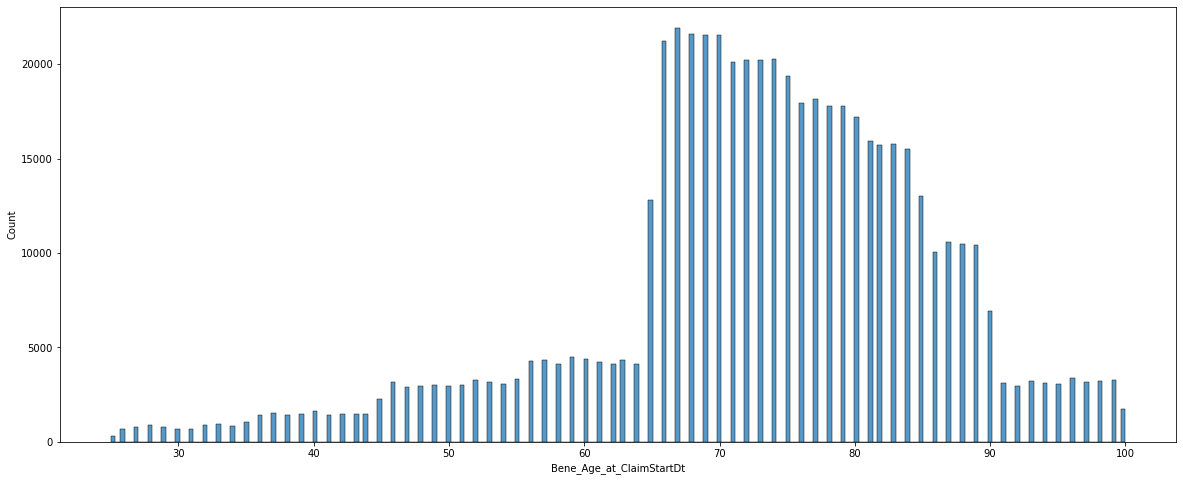

In [30]:
fig, ax = plt.subplots(figsize=(20,8))

sns.histplot(x=xtrain_bene['Bene_Age_at_ClaimStartDt'])

Relationship btwn patient age and chronic conditions. Within train-samples, do these chronics show a definite trend with increasing age?

<AxesSubplot:xlabel='Bene_Age_at_ClaimStartDt', ylabel='Num_ChronicConds'>

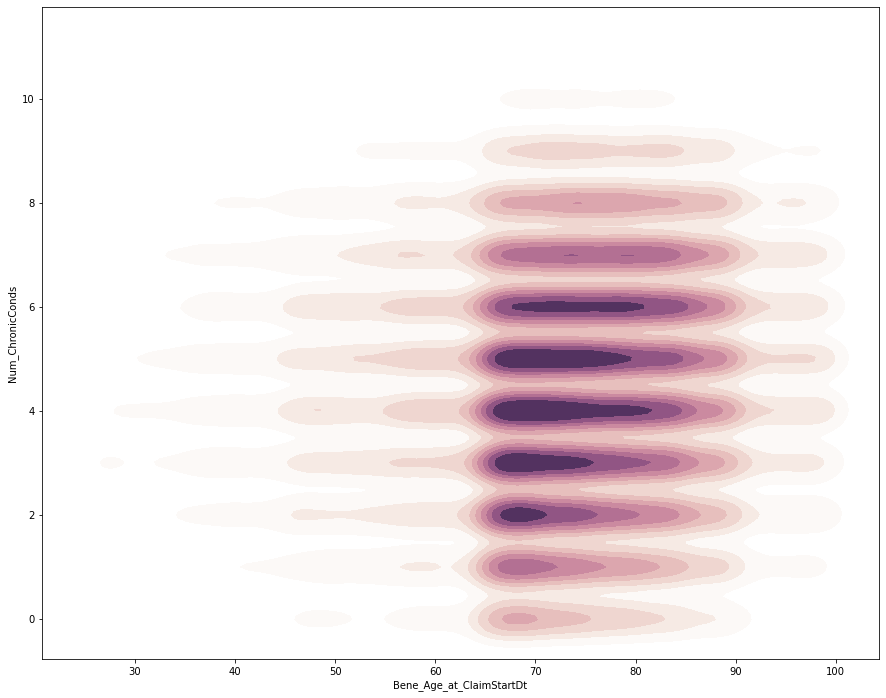

In [31]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.kdeplot(x=xtrain_bene['Bene_Age_at_ClaimStartDt'], y=xtrain_bene['Num_ChronicConds'],
              cmap=sns.cubehelix_palette(light=1, as_cmap=True), fill=True)

Categorize patients according to resource usage - what types of patients would make more outpatient visits.

In [32]:
# admission type: outpatient, eng_outp 
# Scatterplots, dots are beneficiaries
# y=outpatient visits, x is whatever we're examining, targ_chars

# Generate resources aggregation stats
resources_out = eng_outp.groupby('BeneID').agg({'Num_ChronicConds': 'mean',
                               'InscClaimAmtReimbursed': 'sum',
                               'ClaimID': 'count',
                               'ChronicCond_Alzheimer': 'max',
                               'ChronicCond_Heartfailure': 'max', # These signify whether a patient HAS it
                               'ChronicCond_KidneyDisease': 'max',
                               'ChronicCond_Cancer': 'max',
                               'ChronicCond_ObstrPulmonary': 'max',
                               'ChronicCond_Depression': 'max',
                               'ChronicCond_Diabetes': 'max',
                               'ChronicCond_IschemicHeart': 'max',
                               'ChronicCond_Osteoporasis': 'max',
                               'ChronicCond_rheumatoidarthritis': 'max',
                               'ChronicCond_stroke': 'max'})
print(resources_out.columns)
resources_out.rename(columns={'ClaimID': 'Num_Claims'}, inplace=True)
resources_out.head()

Index(['Num_ChronicConds', 'InscClaimAmtReimbursed', 'ClaimID',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'],
      dtype='object')


,Num_ChronicConds,InscClaimAmtReimbursed,Num_Claims,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
BeneID,,,,,,,,,,,,,,
BENE100000,1,120,2,0,0,0,0,0,0,0,1,0,0,0
BENE100001,4,1430,10,1,0,0,0,0,0,0,1,1,0,1
BENE100002,7,1700,13,1,1,0,0,1,1,1,1,0,0,1
BENE100003,1,300,1,0,0,0,0,0,0,0,1,0,0,0
BENE100004,6,380,5,0,1,1,0,1,0,1,1,1,0,0


In [33]:
# Generally examine resource aggregates
resources_out.describe()

,Num_ChronicConds,InscClaimAmtReimbursed,Num_Claims,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
count,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000,133980.000000
mean,3.726086,1106.479475,3.864286,0.330848,0.491402,0.307882,0.119779,0.234095,0.356128,0.600702,0.674138,0.275593,0.257822,0.077698
std,2.352545,2187.279401,3.092396,0.470520,0.499928,0.461619,0.324704,0.423433,0.478855,0.489756,0.468698,0.446814,0.437437,0.267697
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,130.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,450.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1250.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,11.000000,102960.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ditto, but Inpatient visits

In [34]:
#############################
### Inpatient Examination ###
#############################

# Generate resources aggregation stats
resources_inp = eng_inp.groupby('BeneID').agg({'Num_ChronicConds': 'mean',
                               'InscClaimAmtReimbursed': 'sum',
                               'ClaimID': 'count',
                               'ChronicCond_Alzheimer': 'max',
                               'ChronicCond_Heartfailure': 'max', # These signify whether a patient HAS it
                               'ChronicCond_KidneyDisease': 'max',
                               'ChronicCond_Cancer': 'max',
                               'ChronicCond_ObstrPulmonary': 'max',
                               'ChronicCond_Depression': 'max',
                               'ChronicCond_Diabetes': 'max',
                               'ChronicCond_IschemicHeart': 'max',
                               'ChronicCond_Osteoporasis': 'max',
                               'ChronicCond_rheumatoidarthritis': 'max',
                               'ChronicCond_stroke': 'max'})
print(resources_inp.columns)
resources_inp.rename(columns={'ClaimID': 'Num_Claims'}, inplace=True)
resources_inp.head()

Index(['Num_ChronicConds', 'InscClaimAmtReimbursed', 'ClaimID',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'],
      dtype='object')


,Num_ChronicConds,InscClaimAmtReimbursed,Num_Claims,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
BeneID,,,,,,,,,,,,,,
BENE100002,7,12000,1,1,1,0,0,1,1,1,1,0,0,1
BENE100004,6,3000,1,0,1,1,0,1,0,1,1,1,0,0
BENE100006,5,17000,1,1,0,1,0,1,0,1,1,0,0,0
BENE100007,1,4000,1,0,0,0,0,0,0,0,1,0,0,0
BENE100010,7,12000,2,0,1,1,1,1,0,1,1,0,1,0


In [35]:
resources_inp.describe()

,Num_ChronicConds,InscClaimAmtReimbursed,Num_Claims,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
count,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.00000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000
mean,5.205344,13049.219214,1.293554,0.466458,0.682412,0.552494,0.177379,0.426316,0.47106,0.771837,0.832753,0.336476,0.339065,0.149094
std,2.154402,13517.403024,0.628794,0.498882,0.465546,0.497245,0.381995,0.494549,0.49917,0.419655,0.373202,0.472511,0.473399,0.356187
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,5.000000,9000.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,7.000000,16000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
max,11.000000,159000.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Analyze patterns of the total reimbursed amounts (avg reimbursed / visit) vs different types of patients.

Which types of patients contribute more to the providers in terms of aggregate charges or the average charge per visit

In [36]:
print(xtrain_inp.columns)
xtrain_inp.head()

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [37]:
print(xtrain_outp.columns)
xtrain_outp.head()

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [38]:
print(xtrain_benef.columns)
xtrain_benef.head()

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [39]:
print(xtrain_bene.columns)
xtrain_bene[['ClaimID', 'Provider', 'PotentialFraud', 'InscClaimAmtReimbursed', 'MismatchedAdmitDiagnosisCode']].head()

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Length_of_Stay', 'Admission_Type',
       'PotentialFraud', 'Length_of_Claim', 'MonthofClaimStartDt',
       'Num_Physicians', 'Num_ClmProcedureCodes', 'Num_ClmDiagnosisCodes',
       'MismatchedAdmitDiagnosisCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
     

,ClaimID,Provider,PotentialFraud,InscClaimAmtReimbursed,MismatchedAdmitDiagnosisCode
0,CLM46614,PRV55912,1,26000,1
1,CLM66048,PRV55907,0,5000,0
2,CLM68358,PRV56046,0,5000,1
3,CLM38412,PRV52405,0,5000,1
4,CLM63689,PRV56614,0,10000,1


### Part, the 3rd? Time series???

# Digging Deeper: EDA

[Back to Top](#Exploratory-Analysis)

In [40]:
nonnums_described = set(['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                    'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                    'PotentialFraud', 'MismatchedAdmitDiagnosisCode', 'Gender', 'Race',
                    'RenalDiseaseIndicator', 'State', 'County', 'ChronicCond_Alzheimer',
                    'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
                    'ChronicCond_Depression', 'ChronicCond_Diabetes',
                    'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'])

xtb_nums = list(set(xtrain_bene.describe().columns) - nonnums_described)
xtb_nonnums = list(set(xtrain_bene.columns) - set(xtb_nums))
print('Numerical Columns: ' + str(xtb_nums) + '\n')
print('Non-numerical Columns: ' + str(xtb_nonnums) + '\n')
print('Total Cols Named: ' + str(len(xtb_nonnums) + len(xtb_nums)))
print('Total DF Cols: ' + str(len(xtrain_bene.columns)))

Numerical Columns: ['Perc_of_AnnualReimbursement', 'Bene_Age_at_ClaimStartDt', 'IPAnnualReimbursementAmt', 'Num_Physicians', 'DeductibleAmtPaid', 'Length_of_Claim', 'Perc_of_AnnualDeductible', 'NoOfMonths_PartBCov', 'OPAnnualDeductibleAmt', 'TotalAnnualDeductibleAmt', 'Num_ClmDiagnosisCodes', 'Perc_Paid_by_Insurance', 'NoOfMonths_PartACov', 'TotalAnnualReimbursementAmt', 'Num_ChronicConds', 'InscClaimAmtReimbursed', 'OPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'Length_of_Stay', 'Num_ClmProcedureCodes']

Non-numerical Columns: ['Gender', 'PotentialFraud', 'DOD', 'ClaimID', 'AttendingPhysician', 'ClmProcedureCode_4', 'Admission_Type', 'ChronicCond_ObstrPulmonary', 'ClmDiagnosisCode_4', 'DiagnosisGroupCode', 'BeneID', 'RenalDiseaseIndicator', 'DischargeDt', 'ChronicCond_Depression', 'ClmDiagnosisCode_10', 'Provider', 'MismatchedAdmitDiagnosisCode', 'OtherPhysician', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_7', 'DOB', 'ChronicCond_Ischemic